In [2]:
from sympy import *
import matplotlib.pyplot as plt


In [3]:
#Some important equations

#Symbols
V_bi = Symbol('V_bi')
k = Symbol('k')
T = Symbol('T')
N_a = Symbol('N_a')
N_d = Symbol('N_d')
N_i = Symbol('N_i')

VBiEq = Eq(V_bi, k*T*ln(N_a*N_d/(N_i**2)))

#Symbols
e_s = Symbol('e_s')
q_e = Symbol('q_e')
W = Symbol('W')
V_R = Symbol('V_R')

WEq = Eq(W,( 2*e_s*(V_bi+V_R)/q_e*(N_a+N_d)/(N_a*N_d))**.5 )


E_max = Symbol('E_max')
maxEEq = Eq(E_max, 2*(V_bi+V_R)/W)


maxEEq2 = Eq(E_max, 2*(V_bi+V_R)/( ( 2*e_s*(V_bi+V_R)/q_e*(N_a+N_d)/(N_a*N_d))**.5 ))


#Symbols
C = Symbol('C')
A = Symbol('A')

capEq = Eq(C, e_s*A/W)

#Symbols
V_B = Symbol('V_B')
E_crit = Symbol('E_crit')
N_B = Symbol('N_B')

vBreakEq = Eq(V_B,e_s*E_crit**2/(q_e*N_B))

x_n = Symbol('x_n')
xnEq = Eq(x_n, (2*e_s*V_bi/q_e*(N_a/N_d)*(1/(N_a+N_d)))**.5)

x_p = Symbol('x_p')
xpEq = Eq(x_p, (2*e_s*V_bi/q_e*(N_d/N_a)*(1/(N_a+N_d)))**.5)

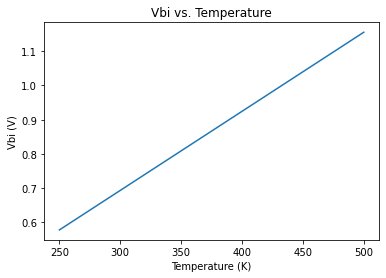

W =  [8.69273732904639e-5, 9.52241664317184e-5, 0.000102853855144333, 0.000109955396245421, 0.000116625309469786, 0.000122933870248843]
xn =  [8.60667062281821e-5, 9.42813529026915e-5, 0.000101835500142904, 0.000108866728955862, 0.000115470603435432, 0.000121716703216676]
xp =  [8.60667062281821e-7, 9.42813529026915e-7, 1.01835500142904e-6, 1.08866728955862e-6, 1.15470603435432e-6, 1.21716703216676e-6]
E_max =  [13293.2075671136, 14561.9792922129, 15728.7353080695, 16814.7253285858, 17834.7094554483, 18799.4344288526]


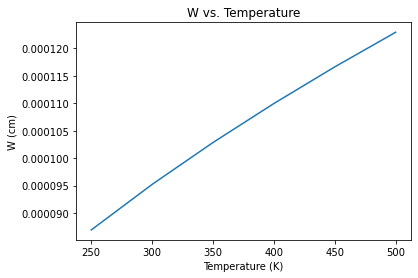

In [6]:
#Question 1
#For an ideal silicon p-n junction with Na=10^17 and Nd=10^15 Calculate Vbi at 250, 300, 350, 400, 450 and 500 K and plot Vbi vs. T Find the depletion layer width W, xn and xp Find the maximum E field at zero bias

#a

#Constants and Givens
k = 8.617E-5 #Boltzmann constant
N_i = 1.5E10 #Intrinsic carrier concentration

N_a = 10**17 #Concentration of acceptors
N_d = 10**15 #Concentration of donors

T = [250, 300, 350, 400, 450, 500] #Temperature in Kelvin
V_bi = [] #List of Vbi values

for i in range(len(T)):
    subbed = VBiEq.subs([("k",k),("T",T[i]),("N_a",N_a),("N_d",N_d),("N_i",N_i)]) #Substitute values into equation
    T_i = solve(subbed,"V_bi") #Solve for Vbi
    V_bi.append(T_i[0]) #Append Vbi to list

#Graph
plt.plot(T,V_bi) #Plot Vbi vs. T
plt.xlabel("Temperature (K)") #Label x-axis
plt.ylabel("Vbi (V)") #Label y-axis
plt.title("Vbi vs. Temperature") #Title
plt.show() #Show graph

#b
#Constants and Givens
e_s = 11.7*8.854E-14 #Relative permittivity of silicon in F/cm
q_e = 1.6E-19 #Electron charge

V_R = 0

W = [] #List of W values
xn = [] #List of xn values
xp = [] #List of xp values
E_max = [] #List of E_max values

for i in range(len(V_bi)): 
    subbed = WEq.subs([("e_s",e_s),("V_bi",V_bi[i]),("q_e",q_e),("N_a",N_a),("N_d",N_d),("V_R",V_R)]) #Substitute values into equation
    T_i = solve(subbed,"W") #Solve for W
    W.append(T_i[0]) #Append W to list

    subbed = xnEq.subs([("e_s",e_s),("V_bi",V_bi[i]),("q_e",q_e),("N_a",N_a),("N_d",N_d)]) #Substitute values into equation
    T_i = solve(subbed,"x_n") #Solve for xn
    xn.append(T_i[0]) #Append xn to list

    subbed = xpEq.subs([("e_s",e_s),("V_bi",V_bi[i]),("q_e",q_e),("N_a",N_a),("N_d",N_d)]) #Substitute values into equation
    T_i = solve(subbed,"x_p") #Solve for xp
    xp.append(T_i[0]) #Append xp to list

    subbed = maxEEq2.subs([("e_s",e_s),("V_bi",V_bi[i]),("q_e",q_e),("N_a",N_a),("N_d",N_d),("V_R",V_R)]) #Substitute values into equation
    T_i = solve(subbed,"E_max") #Solve for E_max
    E_max.append(T_i[0]) #Append E_max to list

#Print results
print("W = ",W) #Print W
print("xn = ",xn) #Print xn
print("xp = ",xp) #Print xp
print("E_max = ",E_max) #Print E_max

#Graph W Vs T
plt.plot(T,W) #Plot W vs. T
plt.xlabel("Temperature (K)") #Label x-axis
plt.ylabel("W (cm)") #Label y-axis
plt.title("W vs. Temperature") #Title
plt.show() #Show graph





In [35]:
#Question 2
#Determine the n type doping concentration to meet the following specifications for a Si p-n junction:  Na=10^18, Emax=4x10^5 V/cm and Vr=30 V, T=300 K

#First calculate V_bi

#Constants and Givens
k = 8.617E-5 #Boltzmann constant
N_i = 1.5E10 #Intrinsic carrier concentration

N_a = 10**18 #Concentration of acceptors
N_d = Symbol("N_d") #Concentration of donors
V_R = 30 #Reverse bias voltage
E_max = 4E5 #Maximum electric field
T = 300 #Temperature in Kelvin

#Solve for V_bi
subbed = VBiEq.subs([("k",k),("T",T),("N_a",N_a),("N_d",N_d),("N_i",N_i)]) #Substitute values into equation
T_i = solve(subbed,"V_bi") #Solve for V_bi
V_bi = T_i[0] #Assign V_bi
V_bi = 0

#Sub into Emax2 
subbed = maxEEq2.subs([("e_s",e_s),("V_bi",V_bi),("q_e",q_e),("N_a",N_a),("N_d",N_d),("V_R",V_R),("E_max",E_max)]) #Substitute values into equation
N_d = solve(subbed,"N_d")[0] #Solve for N_d
print("N_d = ",N_d) #Print N_d


N_d =  1.75686276265609e+16
